In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance

In [3]:
df = pd.read_csv('../input/processed_usd_ent3_clean.csv')

In [4]:
df = df.drop(['Unnamed: 0', 'ITIN_ID', 'RULE_CLASS_ID'], axis=1)
df.head()

,NIGHTS_IN_HOTEL,PREMIUM_CARS,BUSINESS_CLASS_RAILWAYS,BUSINESS_CLASS_AIRLINES,CAR_DAY,AIR_DAY,TRAIN_DAY,IN_CONTINENT,TOTAL_DURATION
0,6,0,0,1,0.0,0.046448,0.0,1,366
1,14,0,0,1,0.0,0.035519,0.0,1,366
2,0,0,0,1,0.0,0.030055,0.0,1,366
3,0,0,0,0,0.0,0.024590,0.0,0,366
4,0,0,0,0,0.0,0.019126,0.0,1,366


In [5]:
def normalize(df):
    columns = df.columns
    x = df.values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=columns)
    joblib.dump(min_max_scaler, 'models/normalize_scaler.pkl')
    return df

In [6]:
normalize(df).head()

,NIGHTS_IN_HOTEL,PREMIUM_CARS,BUSINESS_CLASS_RAILWAYS,BUSINESS_CLASS_AIRLINES,CAR_DAY,AIR_DAY,TRAIN_DAY,IN_CONTINENT,TOTAL_DURATION
0,0.016393,0.0,0.0,1.0,0.0,0.011612,0.0,1.0,1.0
1,0.038251,0.0,0.0,1.0,0.0,0.008880,0.0,1.0,1.0
2,0.000000,0.0,0.0,1.0,0.0,0.007514,0.0,1.0,1.0
3,0.000000,0.0,0.0,0.0,0.0,0.006148,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.0,0.0,0.004781,0.0,1.0,1.0


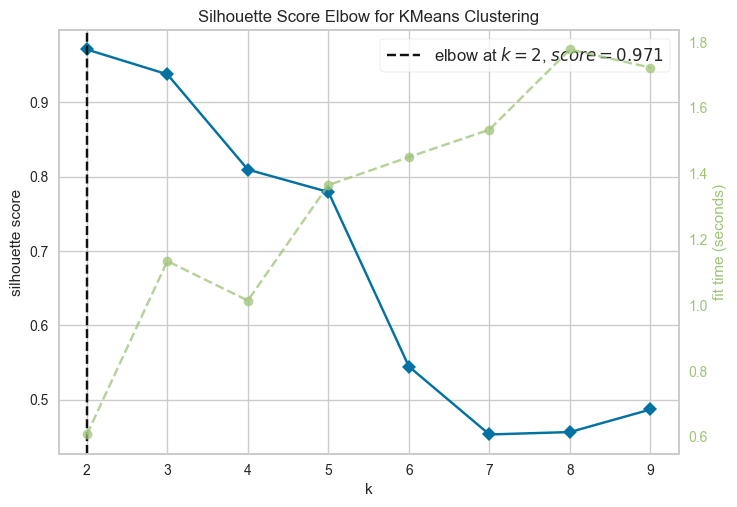

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [7]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')
visualizer.fit(df)
visualizer.show()

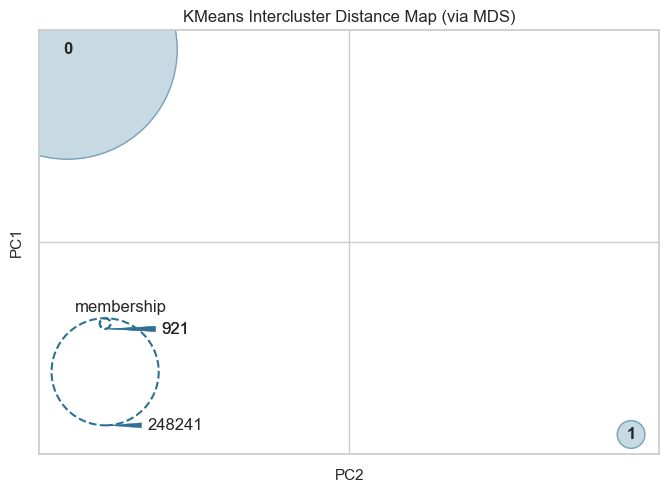

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [8]:
model = KMeans(random_state=1, n_clusters=2)
visualizer = InterclusterDistance(model)
visualizer.fit(df)
visualizer.show()

In [9]:
cluster_labels = visualizer.fit_predict(df)

In [14]:
#df['labels'] = cluster_labels

In [27]:
df.head()

,NIGHTS_IN_HOTEL,PREMIUM_CARS,BUSINESS_CLASS_RAILWAYS,BUSINESS_CLASS_AIRLINES,CAR_DAY,AIR_DAY,TRAIN_DAY,IN_CONTINENT,TOTAL_DURATION,labels
0,6,0,0,1,0.0,0.046448,0.0,1,366,1
1,14,0,0,1,0.0,0.035519,0.0,1,366,1
2,0,0,0,1,0.0,0.030055,0.0,1,366,1
3,0,0,0,0,0.0,0.024590,0.0,0,366,1
4,0,0,0,0,0.0,0.019126,0.0,1,366,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, cluster_labels, random_state=1)

In [19]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
print(f'Currency: {classification_report(pred, y_test)}')
print(confusion_matrix(pred, y_test))

Currency:               precision    recall  f1-score   support

           0       0.99      1.00      0.99     61289
           1       0.99      0.21      0.35      1002

    accuracy                           0.99     62291
   macro avg       0.99      0.61      0.67     62291
weighted avg       0.99      0.99      0.98     62291

[[61287     2]
 [  789   213]]


In [22]:
joblib.dump(clf, 'models/classification.pkl')

['models/classification.pkl']

In [28]:
clf_model = joblib.load('models/classification.pkl')

In [29]:
def predict(arr):

    label = clf_model.predict(df)

In [30]:
df_cols = pd.read_csv('input/processed_usd_ent3_clean.csv').columns

In [31]:
df_cols

Index(['Unnamed: 0', 'ITIN_ID', 'RULE_CLASS_ID', 'NIGHTS_IN_HOTEL',
       'PREMIUM_CARS', 'BUSINESS_CLASS_RAILWAYS', 'BUSINESS_CLASS_AIRLINES',
       'CAR_DAY', 'AIR_DAY', 'TRAIN_DAY', 'IN_CONTINENT', 'TOTAL_DURATION'],
      dtype='object')